# Time series modelling of exchange rates

In [368]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')
#USD/currency
#https://data.humdata.org/dataset/ecb-fx-rates?force_layout=desktop
forex = "ECB_FX_USD-quote.csv"
currencies = pd.read_csv(forex, delimiter=',', parse_dates=['Date'], index_col=['Date'])
currencies.head(20)

,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-10,1.0554,0.007682,0.539626,0.042192,0.141882,1.233016,0.002776,0.225691,0.213393,0.099496,...,0.288463,0.012943,0.000784,0.049153,0.228204,0.631711,0.019089,0.719575,0.028956,0.062064
2022-05-09,1.0559,0.007646,0.539881,0.042143,0.141951,1.238810,0.002755,0.224731,0.213455,0.099785,...,0.291371,0.012918,0.000785,0.049263,0.228130,0.636698,0.018967,0.719474,0.028931,0.061629
2022-05-06,1.0570,0.007665,0.540444,0.042854,0.142070,1.234453,0.002771,0.224760,0.213579,0.100969,...,0.293897,0.013002,0.000787,0.049495,0.228832,0.642944,0.019056,0.721896,0.029116,0.062318
2022-05-05,1.0568,0.007704,0.540342,0.042949,0.142033,1.240521,0.002791,0.226426,0.213560,0.101862,...,0.294242,0.013109,0.000794,0.049833,0.229964,0.649419,0.019088,0.725774,0.029334,0.063716
2022-05-04,1.0531,0.007696,0.538450,0.042733,0.141529,1.250802,0.002789,0.224661,0.212876,0.101291,...,0.296757,0.013098,0.000791,0.049454,0.229699,0.644768,0.019057,0.723333,0.029142,0.063253
2022-05-03,1.0556,0.007702,0.539728,0.042803,0.141876,1.254725,0.002762,0.224955,0.213360,0.101521,...,0.296542,0.013058,0.000790,0.049092,0.229698,0.644996,0.019035,0.722766,0.029010,0.062720
2022-05-02,1.0524,0.007703,0.538092,0.042657,0.141469,1.255697,0.002780,0.224632,0.212701,0.101158,...,0.298325,0.013074,0.000789,0.049004,0.229701,0.643198,0.019055,0.721563,0.029065,0.062874
2022-04-29,1.0540,0.007693,0.538910,0.042837,0.141638,1.256138,0.002783,0.225310,0.213020,0.102372,...,0.301203,0.013071,0.000794,0.049211,0.229700,0.653887,0.019094,0.724648,0.029257,0.063314
2022-04-28,1.0485,0.007646,0.536098,0.042751,0.140888,1.243035,0.002781,0.223604,0.211908,0.101212,...,0.298752,0.013046,0.000784,0.048874,0.229225,0.646384,0.019118,0.720322,0.029003,0.062607


In [369]:
currencies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5980 entries, 2022-05-10 to 1999-01-04
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUR     5980 non-null   float64
 1   JPY     5980 non-null   float64
 2   BGN     5582 non-null   float64
 3   CZK     5980 non-null   float64
 4   DKK     5980 non-null   float64
 5   GBP     5980 non-null   float64
 6   HUF     5980 non-null   float64
 7   PLN     5980 non-null   float64
 8   RON     4316 non-null   float64
 9   SEK     5980 non-null   float64
 10  CHF     5980 non-null   float64
 11  ISK     3639 non-null   float64
 12  NOK     5980 non-null   float64
 13  HRK     4381 non-null   float64
 14  RUB     4333 non-null   float64
 15  TRL     1537 non-null   float64
 16  TRY     4443 non-null   float64
 17  AUD     5980 non-null   float64
 18  BRL     3676 non-null   float64
 19  CAD     5980 non-null   float64
 20  CNY     4381 non-null   float64
 21  HKD     5980 non-nu

# Inspect for missing values in dataset

In [370]:
currencies.isnull().values.any()

True

In [371]:
currencies.isnull().sum()

EUR       0
JPY       0
BGN     398
CZK       0
DKK       0
GBP       0
HUF       0
PLN       0
RON    1664
SEK       0
CHF       0
ISK    2341
NOK       0
HRK    1599
RUB    1647
TRL    4443
TRY    1537
AUD       0
BRL    2304
CAD       0
CNY    1599
HKD       0
IDR    1599
ILS    3074
INR    2560
KRW       0
MXN    2304
MYR    1599
NZD       0
PHP    1599
SGD       0
THB    1599
ZAR       0
dtype: int64

In [372]:
currencies.loc['2000']['CZK']

Date
2000-12-29    0.026550
2000-12-28    0.026483
2000-12-27    0.026624
2000-12-22    0.026475
2000-12-21    0.026265
                ...   
2000-01-07    0.028545
2000-01-06    0.028662
2000-01-05    0.028533
2000-01-04    0.028412
2000-01-03    0.027979
Name: CZK, Length: 255, dtype: float64

# Selecting currencies for timeseries models

In [373]:
gbp = currencies['GBP']
eur = currencies['EUR']
czk = currencies['CZK']



Date
2022-05-10    1.233016
2022-05-09    1.238810
2022-05-06    1.234453
2022-05-05    1.240521
2022-05-04    1.250802
                ...   
1999-01-08    1.643502
1999-01-07    1.647942
1999-01-06    1.659553
1999-01-05    1.655434
1999-01-04    1.657854
Name: GBP, Length: 5980, dtype: float64

# The search for stationarity
Stationarity assumes that there is stable dependent relationship between outputs at different lags. This gives us the option to use statistical modelling.
## Stationarity conditions:
1. $\mu$ (mean) is constant
2. $\sigma$ (standard dev) is constant
3. There is no seasonality or trend

## How to test for stationarity?
1. Visual analysis
2. Augmented Dickie-Fuller test (ADF)





## ADF test
Determines whether the series has unit root or not.
**Null Hypothesis:** The series has a unit root == non-stationary
**Alternate Hypothesis:** The series has no unit root == stationary

In [374]:
from scipy.stats.stats import moment
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import gaussian_kde, norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def show_stats(currency):
    mean, var, skew, kurtosis = moment(currency, moment=[1, 2, 3, 4])
    string = f"Mean: {mean:.4f}\n Var: {var:.4f}\n Skew: {skew:.4f} \n Kurt: {kurtosis:.4f} \n ADF(p-val): {adfuller(currency)[1]:.4f}\n"
    return string


In [375]:


def plot_correlation(currency,title_name, lags=None):
    lags = min(10, int(len(currency)/5)) if lags is None else lags
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(2,2, figsize=(12, 12))
    fig.suptitle(title_name)

    axs[0][0].hist(currency, density=True, label="Hist")
    axs[0][0].set_title("Histogram")

    qqplot(currency, line="s", ax=axs[0][1])
    axs[0][1].set_title("Normal Q-Q")

    plot_acf(x=currency, lags=lags, zero=False, ax=axs[1][0])
    axs[1][0].set_title("ACF")
    axs[1][0].set_ylim(-0.25, 0.25)

    plot_pacf(x=currency, lags=lags, zero=False, ax=axs[1][1])
    axs[1][1].set_title("PACF")
    axs[1][1].set_ylim(-0.25, 0.25)

    fig.tight_layout()
    fig.subplots_adjust(top=.9)
    plt.show()


In [376]:
from statsmodels.tsa.stattools import q_stat, acf
from scipy.stats import probplot


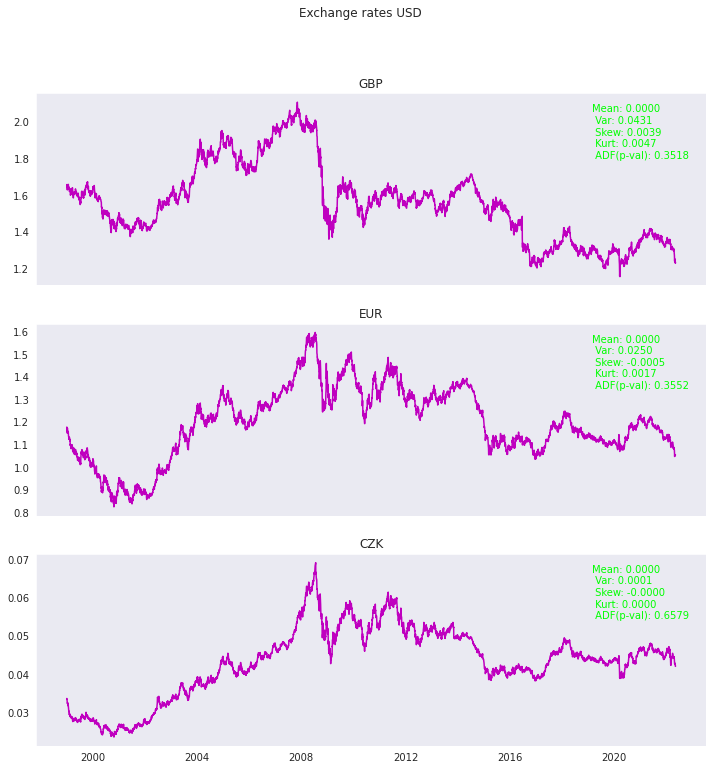

In [377]:
def plot_currencies(curr_list, curr_names, title_name):
    title_name = str(title_name)
    num_of_currencies = len(curr_list)
    sns.set_style('dark')
    fig, axs = plt.subplots(num_of_currencies, sharex=True, figsize=(12, 12))
    fig.suptitle(title_name)
    for i, name in enumerate(curr_names):
        axs[i].set_title(name)
    for i, obj in enumerate(curr_list):
        axs[i].plot(obj, c='m')
        axs[i].text(x=0.83, y=0.6, s=show_stats(obj),transform=axs[i].transAxes, c='lime')


    plt.show()

plot_currencies(curr_list=[gbp, eur, czk], curr_names=['GBP','EUR', 'CZK'], title_name='Exchange rates USD')

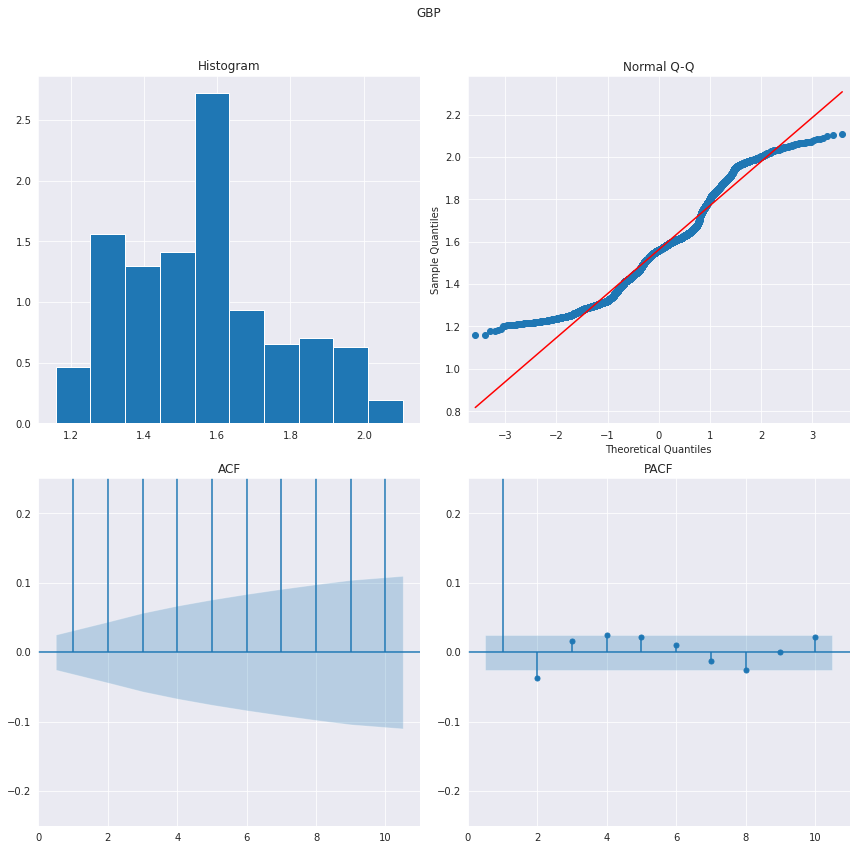

In [378]:
plot_correlation(gbp,title_name="GBP")

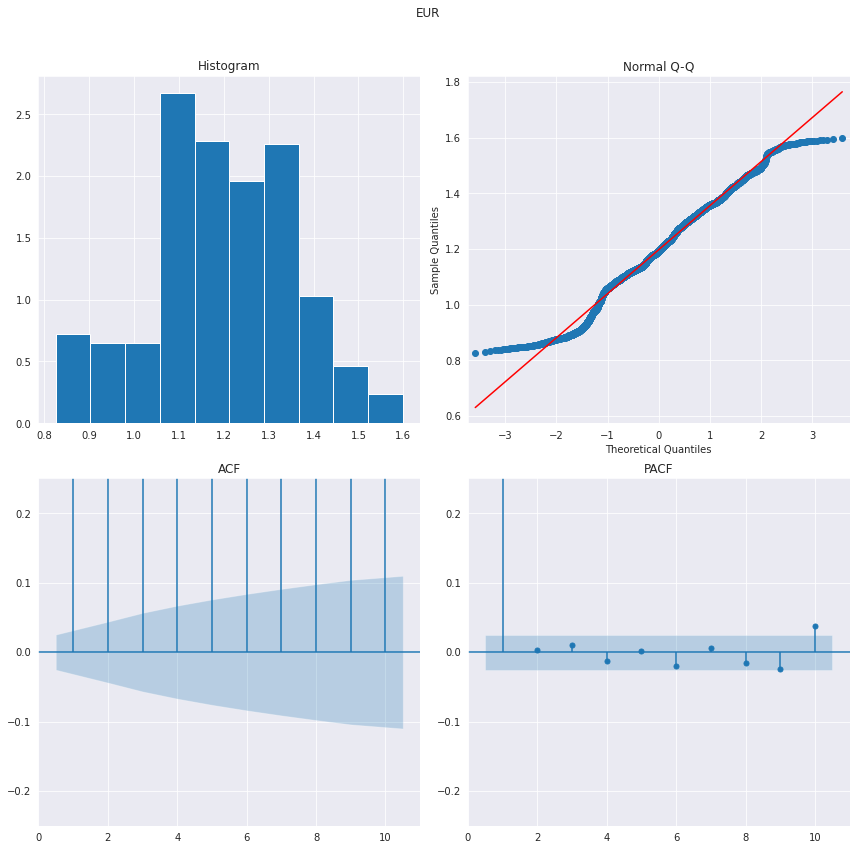

In [379]:
plot_correlation(eur,title_name="EUR")

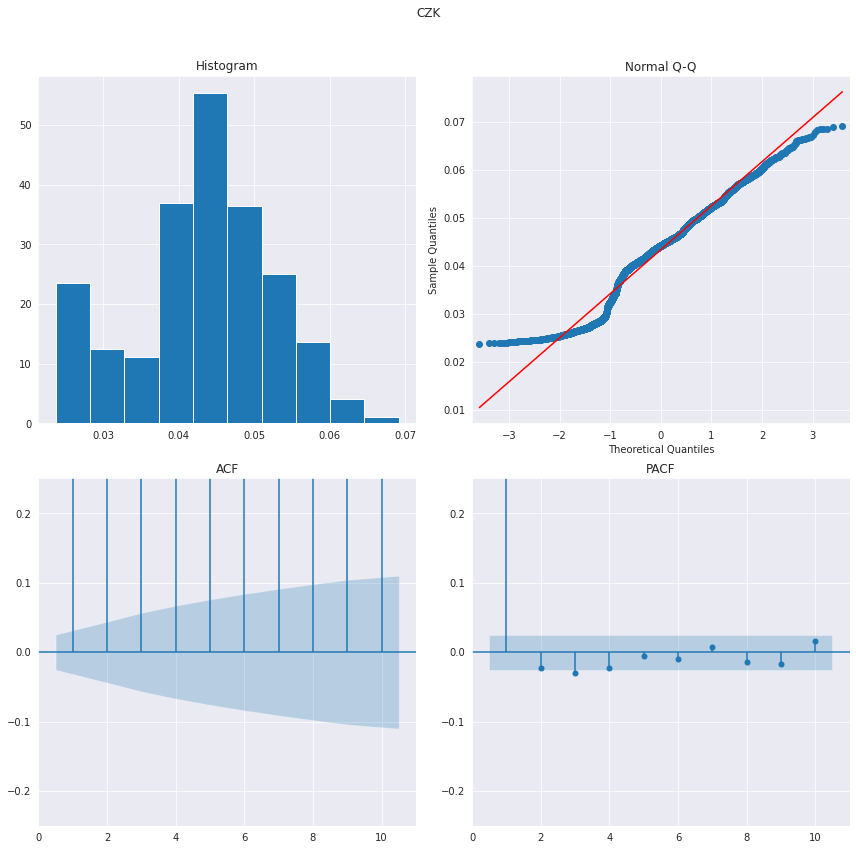

In [380]:
plot_correlation(czk,title_name="CZK")

# Log transformation
for more stable variance

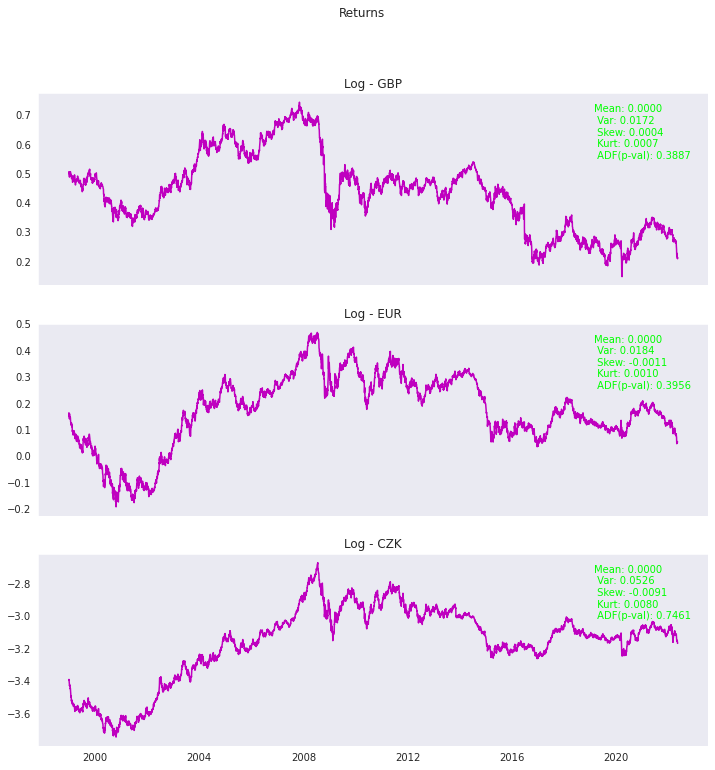

In [381]:
log_gbp = np.log(gbp)
log_eur = np.log(eur)
log_czk = np.log(czk)

plot_currencies(curr_list=[log_gbp, log_eur, log_czk], curr_names=['Log - GBP','Log - EUR', 'Log - CZK'], title_name='Returns')

# Differentiation



In [382]:
diff_gbp = log_gbp.diff().dropna()
diff_eur = log_eur.diff().dropna()
diff_czk = log_czk.diff().dropna()


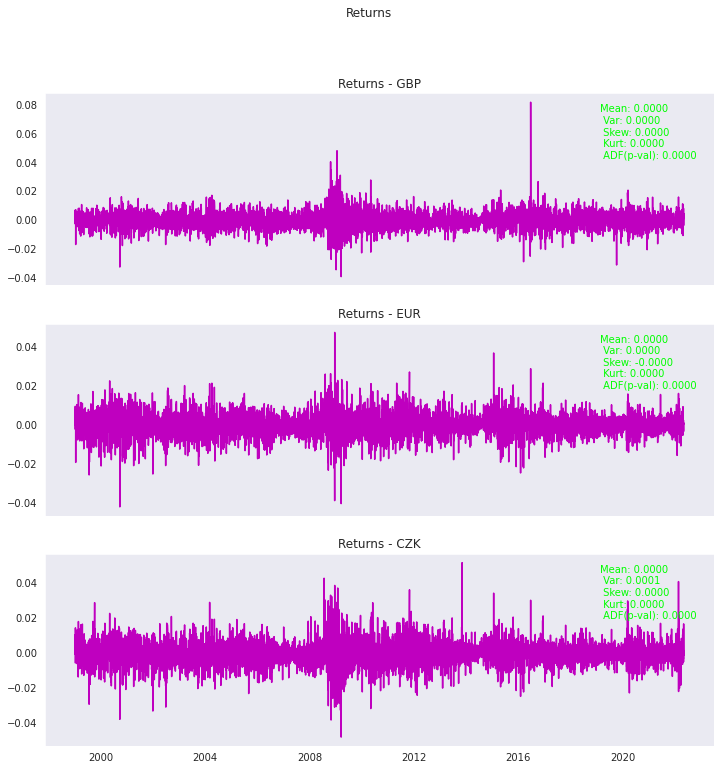

In [383]:
plot_currencies(curr_list=[diff_gbp, diff_eur, diff_czk], curr_names=['Returns - GBP','Returns - EUR', 'Returns - CZK'], title_name='Returns')

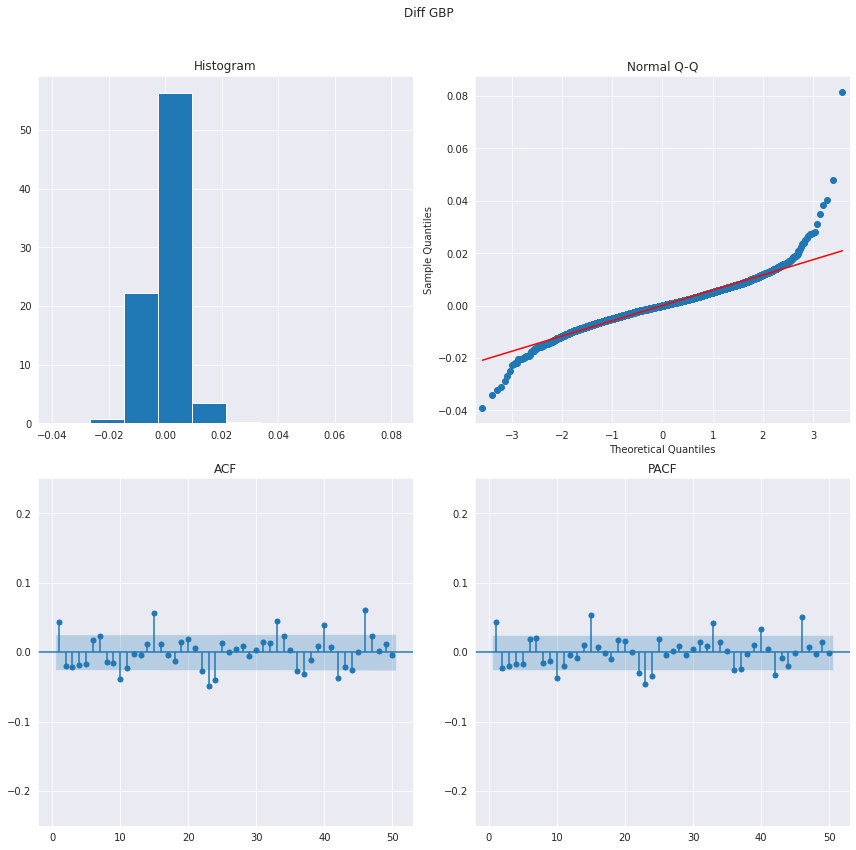

In [384]:
plot_correlation(currency=diff_gbp, title_name="Diff GBP", lags=50)

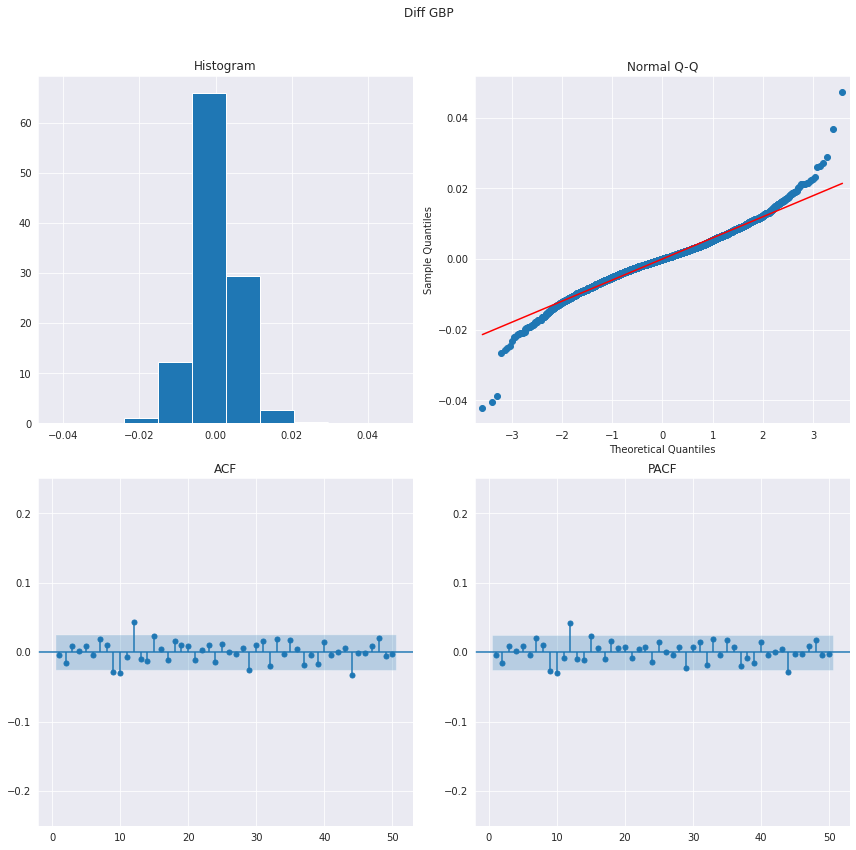

In [385]:
plot_correlation(currency=diff_eur, title_name="Diff GBP", lags=50)

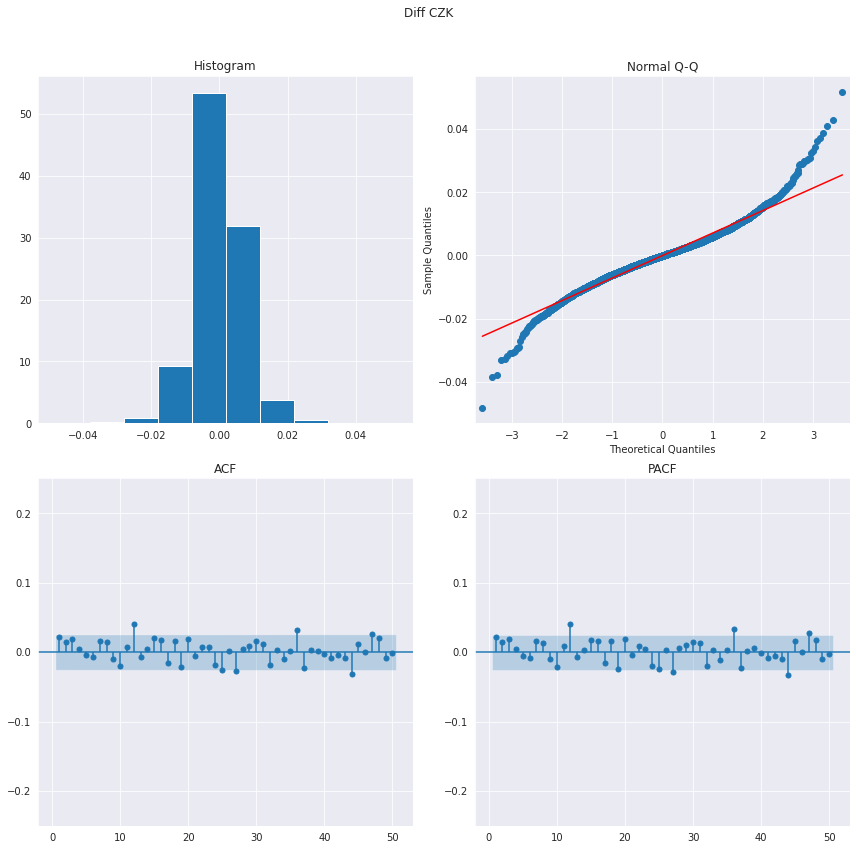

In [386]:
plot_correlation(currency=diff_czk, title_name="Diff CZK", lags=50)

In [388]:
industrial_production = web.DataReader('IPGMFN', 'fred', '1988', '2017-12').squeeze().dropna()
industrial_production.head(20)


DATE
1988-01-01    55.8841
1988-02-01    57.0773
1988-03-01    57.7470
1988-04-01    57.9755
1988-05-01    58.0678
1988-06-01    59.4483
1988-07-01    56.1214
1988-08-01    58.0494
1988-09-01    59.3745
1988-10-01    59.7368
1988-11-01    58.5644
1988-12-01    57.4822
1989-01-01    58.1578
1989-02-01    58.6116
1989-03-01    58.5697
1989-04-01    59.4608
1989-05-01    58.5625
1989-06-01    59.9961
1989-07-01    55.8826
1989-08-01    58.6611
Name: IPGMFN, dtype: float64